(chapter3_part1)=

# Linear Regression

- This is a supplement material for the [Machine Learning Simplified](https://themlsbook.com) book. It sheds light on Python implementations of the topics discussed while all detailed explanations can be found in the book. 
- I also assume you know Python syntax and how it works. If you don't, I highly recommend you to take a break and get introduced to the language before going forward with my code. 
- This material can be downloaded as a Jupyter notebook (Download button in the upper-right corner -> `.ipynb`) to reproduce the code and play around with it. 


<!-- The structure of this notebook is similar to the structure of Chapter 3 of [MLS](https://themlsbook.com) book.

1. Problem Representation
2. Learning a Prediction Function
3. How Good is our Prediction Function?
4. Build Regressions with Wrong Parameters
5. Cost Function
6. Gradient Descent -->

## 1. Required Libraries & Functions

Before we start, we need to import few libraries that we will use in this jupyterbook.

In [1]:
import numpy as np #to work with numbers
import matplotlib.pyplot as plt #to build graphs
from sklearn.linear_model import LinearRegression #to build a linear regression
%config InlineBackend.figure_format = 'retina' #to make sharper and prettier plots

## 2. Problem Representation

Let's recall Chapter 3 of [the Machine Learning Simplified book](https://themlsbook.com). We have a hypothetical dataset of six apartments located in the center of Amsterdam along with their prices (in 10,000 EUR) and floor areas (in square meters).

| area ($m^2$) | price (in €10,000) |
| ----------- | ----------- |
| 30 | 31 | 
| 46 | 30 |
| 60 | 80 |
| 65 | 49 |
| 77 | 70 |
| 95 | 118 |

### 2.1. Create Hypothetical Dataset


To create two arrays, X and Y, we use `numpy` (`np`) library that we have already loaded it in the beginning of this notebook.

In [2]:
x = np.array([[30], [46], [60], [65], [77], [95]])
y = np.array([31, 30, 80, 49, 70, 118])

### 2.2. Visualize the Dataset

Let's now make the same graph that we had in the book (Figure 3.1). We can do so by using `matplotlib` library that we loaded in the beginning of this notebook.

(0.0, 110.0)

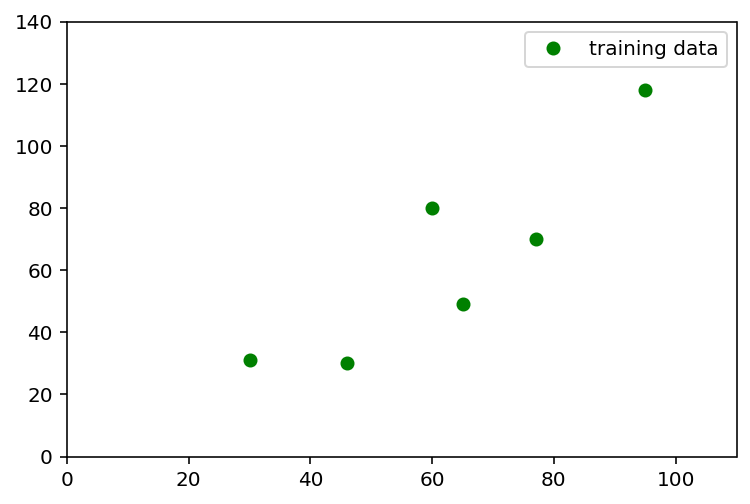

In [3]:
#define the graph
fig, ax = plt.subplots()

#plotting training dataset
ax.plot(x, y, 'o', color='g', label='training data')

#showing legend and setting the size of the graph
plt.legend(); #show legend
plt.ylim(0, 140) #length of y-axis
plt.xlim(0, 110) #length of x-axis

## 3. Learning a Prediction Function

Let's now build a simple regression with our data and then visualize it with the graph.

### 3.1. Build a Linear Regression

First, we **initialize** our `Linear Regression` algorithm. We use `LinearRegression` from `sklearn` library that we loaded in the beginning.

In [4]:
#initialize the linear regression model
reg = LinearRegression()

Second, we pass `x` and `y` to that algorithm for learning.

In [5]:
#train your model with x and y values
reg = LinearRegression().fit(x, y)

After the learning is done, we can check the estimated coefficient and intercept of the function. For that, we can just call `reg.coef_` and `reg.intercept_` from `reg`.

In [6]:
print(f'coefficient (parameter a) = {reg.coef_[0].round(1)}')
print(f'intercept (parameter b) = {reg.intercept_.round(0)}')

coefficient (parameter a) = 1.3
intercept (parameter b) = -18.0


### 3.2. Vizualize Linear Regression

Now we know the fitted function - $f(x) = -18.0  + 1.3*x$, we can plot it. For that, we can use `matplotlib` library.

(0.0, 110.0)

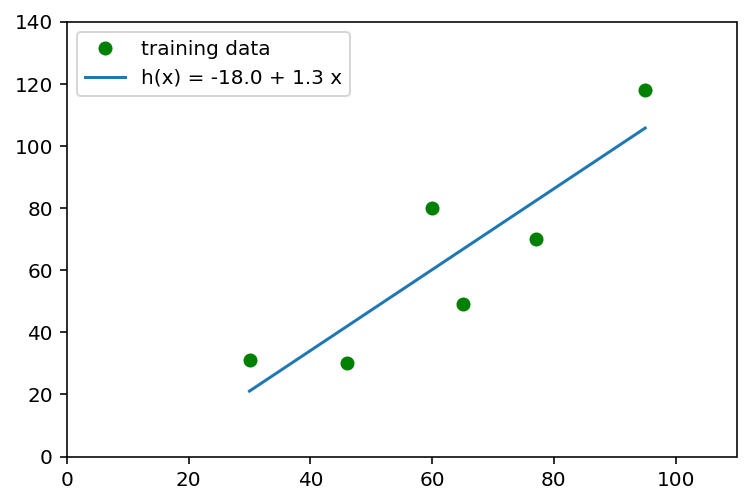

In [7]:
#define the graph
fig, ax = plt.subplots()

#plotting training dataset
ax.plot(x,y, 'o', color='g', label='training data')

#plotting the fitted regression
ax.plot(x, reg.intercept_ + reg.coef_[0]*x, label=f'h(x) = {reg.intercept_.round(0)} + {reg.coef_[0].round(2)} x') 

#showing legend and setting the size of the graph
plt.legend(); #show legend
plt.ylim(0, 140) #length of y-axis
plt.xlim(0, 110) #length of x-axis

## 4. How Good is our Prediction Function?

The next step is to evaluate how good our model is. The "goodness of fit" can be represented by the Sum of Squared Residuals (SSR). Let's first calculate residuals!

### 4.1. Draw Residuals

Before we go into actual math, I'd like to briefly remind you what a residual is. And there is no better way as to simply plot a nice plot!

/Users/andrewwolf/Library/Caches/pypoetry/virtualenvs/themlsbook-8peXrHpY-py3.9/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


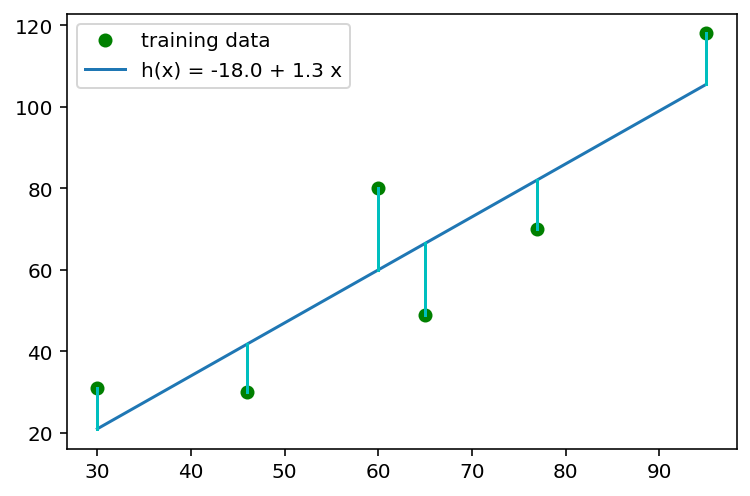

In [8]:
fig, ax = plt.subplots()
ax.plot(x,y, 'o', color='g', label='training data')
ax.plot(x, -18.0  + 1.3*x, label=f'h(x) = {reg.intercept_.round(0)} + {reg.coef_[0].round(2)} x') 

for i in range(len(x)):
    ax.plot([x[i], x[i]], [-18.0  + 1.3*x[i],y[i]], '-', color='c')
plt.legend();

The blue vertical lines represent the residuals - the difference between the actual data points and the predicted (by our model) values. So, in order to find the SSR, we need to find residuals first.

In [9]:
#preparing empty list for predicted values
y_pred = []

#simple loop to calculate each value predicted by the function, y_pred
for i in x:
    y_pred.append(-18 + 1.3*i)

print(f'Predicted values {y_pred}')

Predicted values [array([21.]), array([41.8]), array([60.]), array([66.5]), array([82.1]), array([105.5])]


In [10]:
#preparing empty list for residuals
r = []

#simple loop to calculate each redisual, r
for i in range(0, len(x)):
    r.append(y[i]-y_pred[i])
print(f'Residuals: {r}')

Residuals: [array([10.]), array([-11.8]), array([20.]), array([-17.5]), array([-12.1]), array([12.5])]


### 4.2. Calculating Sum of Squared Residuals (SSR)

Let's calculate SSR. The formula for calculating SSR is:
  $$SSR = \sum (y_i-\hat{y}_i)^2=\sum(r_i)^2$$
where
- $y_i$ is a value of an observed target variable $i$
- $\hat{y}_i$ is a value of $y$ predicted by the model with a specific $x_i$ ($\hat{y}_i=ax_i+b$). 

Because we've already calculated residuals:

In [11]:
r_squared = []

#simple loop to take each residual and find its square number
for i in r:
    r_squared.append(i**2)
print(f'Squared residuals: {r_squared}')

Squared residuals: [array([100.]), array([139.24]), array([400.]), array([306.25]), array([146.41]), array([156.25])]


In [12]:
ssr = sum(r_squared)
print(f'SSR={ssr}')

SSR=[1248.15]


Hence, the SSR for the function $f(x) = -18.0  + 1.3*x$ is $1248.15$.

## 5. Build Regressions with Wrong Parameters

Just like we did in the [MLS](https://themlsbook.com) book, let's now build two regressions with random values for coefficient ($a$) and intercept ($b$), and see how their SSR would differ from the "true" regression $y=1.3x -18$ (estimated in Section 2.1.)

### 5.1. Regression I

Let's plot regression $y=-10x+780$ and calculate its SSR.

(0.0, 110.0)

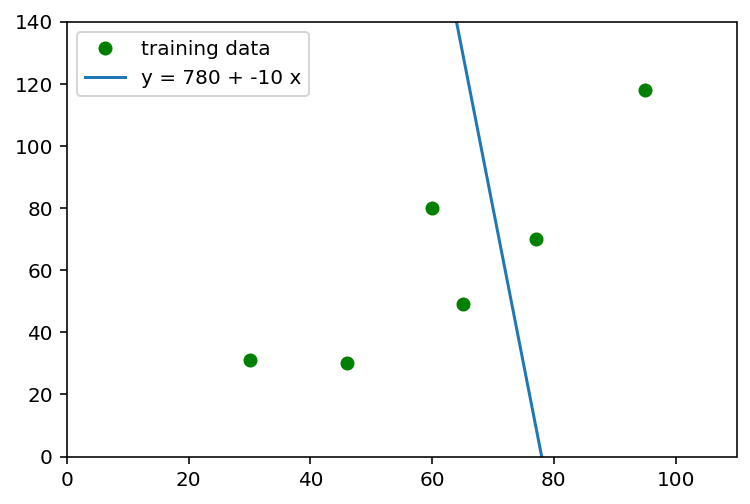

In [13]:
#plotting regression

fig, ax = plt.subplots()
ax.plot(x,y, 'o', color='g', label='training data')
ax.plot(x, 780 + -10*x, label='y = 780 + -10 x')

plt.legend();
plt.ylim(0, 140)
plt.xlim(0, 110)

In [14]:
#calculating SSR

#preparing empty lists
y_pred = []
r = []

for i in x:
    y_pred.append(780 + -10*i)
    
for i in range(0, len(x)):
    r.append((y[i]-y_pred[i])**2)

np.sum(r)

388806

> For the Regression 1, $SSR=388,806$. 

Let's proceed with another regression, Regression 2, and execute the same tasks!

### 5.2. Regression II


Let's plot regression $y=4*x-190$ and calculate its SSR.

(0.0, 110.0)

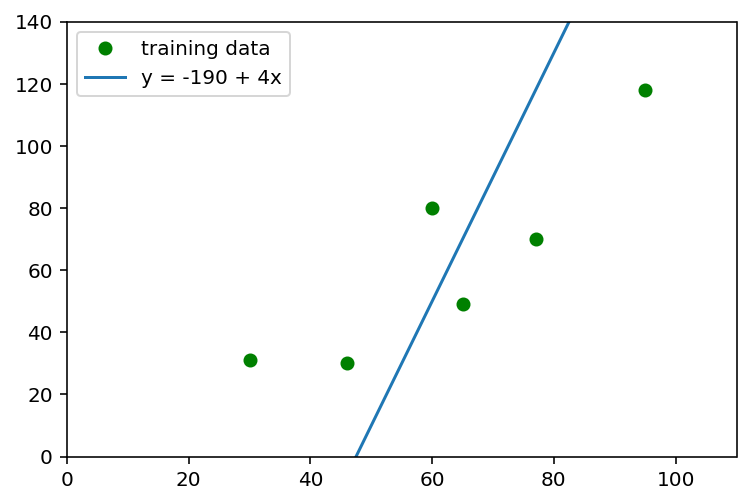

In [15]:
#plotting regression

fig, ax = plt.subplots()

ax.plot(x,y, 'o', color='g', label='training data')
ax.plot(x, -190+4*x, label='y = -190 + 4x')

plt.legend();
plt.ylim(0, 140)
plt.xlim(0, 110)

In [16]:
#calculating SSR

y_pred = []
r = []
for i in x:
    y_pred.append(-190 + 4*i)
    
for i in range(0, len(x)):
    r.append((y[i]-y_pred[i])**2)

np.sum(r)

20326

> For the Regression 2, $SSR=20,326$.

If you compare Regression 1 and Regression 2, you might notice that, as the line follows the data points, it shrinks the residuals, and lowers the Sum of Squared Residuals.